# Data Cleansing : Start

In [710]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_colwidth',300)
pd.set_option('display.max_rows',900)

In [711]:
TerrorDTframe=pd.read_csv('global_terrorism_clean.csv')

In [712]:
TerrorDTframe.head()

,date,type,dead,injured,location,details,perpetrator
0,1970-01-13,Shotdown,7,0,"Urabá, Colombia",An UH-1 Iroquois helicopter from the Colombian Air Force disappears amidst strange circumstances in the Urabá Antioquia. The PLA was awarded its shotdown. The seven crew members died.[1],EPL
1,1970-02-08,Bombing,0,0,"Belfast, Northern Ireland",A bomb explodes at the home of Ulster Liberal Party MP Sheelagh Murnaghan,Ulster Volunteer Force
2,1970-02-10,"Shooting, grenade attacks",1,23,"Munich, West Germany","A bus carrying passengers to an El Al airplane at the Munich-Riem Airport, West Germany was attacked by Palestinian terrorists. One person was killed and 23 were wounded in the attack.[2]",PDFLP
3,1970-02-18,Bombing,0,0,"County Donegal, Republic of Ireland",A bomb detonated in a TV station that transmitted RTÉ (Mainly Irish broadcaster),Ulster Volunteer Force
4,1970-02-21,Bombing,47,0,Switzerland,"A bomb explodes in the rear of Swissair Flight 330, causing it to crash near Zürich, killing 38 passengers and all 9 crew members. The attack was carried out by Palestinian group PFLP-GC",PFLP-GC


# The process of extracting the name of the country from column:"Location":
###  Now the location column will have only the  country names

In [714]:
import pycountry
countryList=[]
for each in pycountry.countries:
    countryList.append(each.name)


In [715]:
countryList.append('Iran')
countryList.append('Russia')
countryList.append('Syria')
countryList.append('Gaza City')
countryList.append('Bolivia')
countryList.append('Bosnia')
countryList.append('West Bank')
countryList.append('Rafah')
countryList.append('Ivory Coast')
countryList.append('Kedumim')
countryList.append('Transnistria') 
if 'Baghdad' in countryList:
    print('yes')
countryList[0:5]

['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Åland Islands']

In [716]:
def ExtractCountry(locName):
    flag=False
    tempstr=''
    for each in countryList:
        if each in locName:
            flag=True
            tempstr = each
    if flag==True:
        return tempstr
    else:
        return ''
        

In [717]:
TerrorDTframe['location'] = TerrorDTframe.location.apply(lambda x: ExtractCountry(x))

### The process of extracting the name of the country from Location Ends : 


In [719]:
TerrorDTframe = TerrorDTframe[TerrorDTframe.location.notna()]

In [720]:
TerrorDTframe.rename(columns={'date':'Date','type':'Type','dead':'Dead','injured':'Injured','location':'Location',\
                             'details':'Description','perpetrator':'Perpetrators'},inplace=True)

## Using NLP: Removing the stopwords from the Description column of TerrorDTframe

In [722]:
import nltk
from nltk.corpus import stopwords
StopWrds = stopwords.words('english')
from nltk.tokenize import word_tokenize as wt
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer 
import re
for each in [',','.']:
    StopWrds.append(each)

In [723]:

wnl = WordNetLemmatizer()
ps=PorterStemmer()
def funcNLP(description):
    wrdset= wt(description)
    filtered_description = ''
    filtered_sentence_list = [wnl.lemmatize(elem) for elem in wrdset if elem.lower() not in StopWrds ]
    filtered_description = ' '.join(each for each in filtered_sentence_list)
    filtered_description = re.sub('\[.*\]','',filtered_description)
    return (filtered_description)
    

In [724]:
TerrorDTframe['Description'] = TerrorDTframe['Description'].apply(lambda x : funcNLP(x))

In [725]:
#NLP extraction technique ends

In [726]:
# Converting all the blank fields to np.nan and then removing the rows containing nan values from the dataframe

In [727]:
def func(elem):
    if str(elem) == '':
        return np.nan
    else:
        return elem
        
    

In [728]:
TerrorDTframe = TerrorDTframe.applymap(lambda x: func(x))

In [729]:
TerrorDTframe.isna().sum()

Date              0
Type              3
Dead              0
Injured           0
Location        129
Description      77
Perpetrators    410
dtype: int64

In [730]:
TerrorDTframe_notna = TerrorDTframe.dropna(axis=0,how='any')

In [731]:
TerrorDTframe_notna.isna().sum()

Date            0
Type            0
Dead            0
Injured         0
Location        0
Description     0
Perpetrators    0
dtype: int64

In [732]:
TerrorDTframe_notna.to_csv('C:\\Users\\supratik chanda\\Documents\\All Docs\\FinalTerrorDataFrame.csv')

# Data Cleansing: Stop

# Start of Analyzing DataSet

# Killing Worldwide

## Killings by Year

##### Let’s start by looking to the killings in terror activities. In the following , the size of the areas corresponding to each year is proportional with the number of kills in that year in the terrorist activities. We can easily see that there was a massive increase in killings in terrorist activities in the years from 2012 and in the last 3 years (2017-2019) the volume was significantly higher than in the previous years.

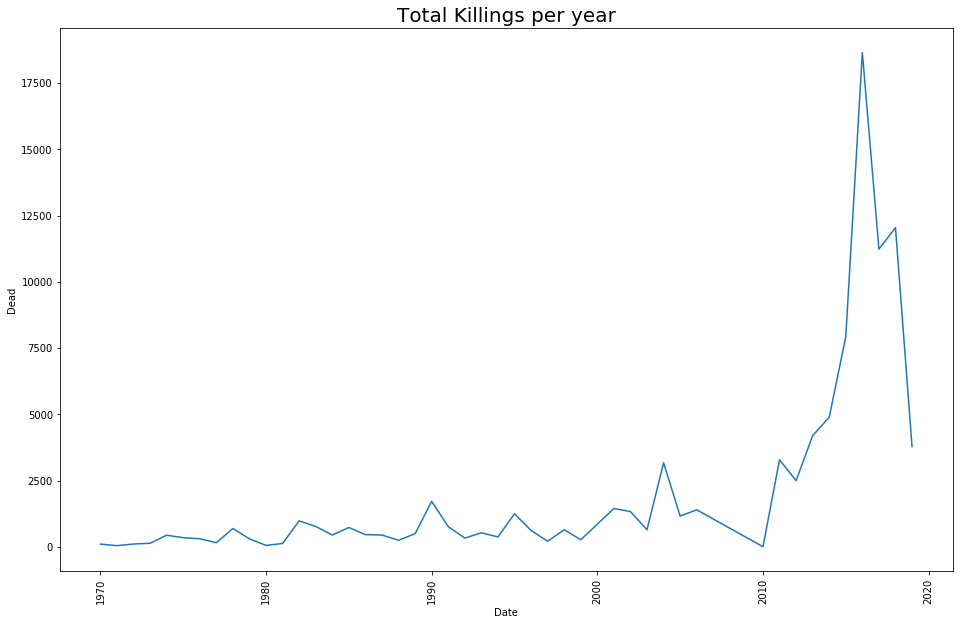

In [924]:
killing_worldwide = TerrorDTframe_notna.groupby('Date').agg({'Dead':np.sum})
killing_worldwide =killing_worldwide .reset_index(drop=False) 
import squarify
plt.figure(figsize=(16,10))
sns.lineplot(x=killing_worldwide['Date'],y=killing_worldwide['Dead'])
#squarify.plot(sizes=killing_worldwide['Dead'], label=killing_worldwide['Date'],alpha=0.4)
#plt.axis('off')
plt.title('Total Killings per year',fontsize=20)
plt.xticks(rotation=90)
plt.show()


## Killings by country

##### If we look now to the country split, we see that there are few countries where the number of killed people in terrorist attacks is very large. Some of them have experienced recent massive increase, like Iraq, Nigeria, Syria and Afganistan while others have a long history, like Sri Lanka, Colombia, India, Pakistan. 

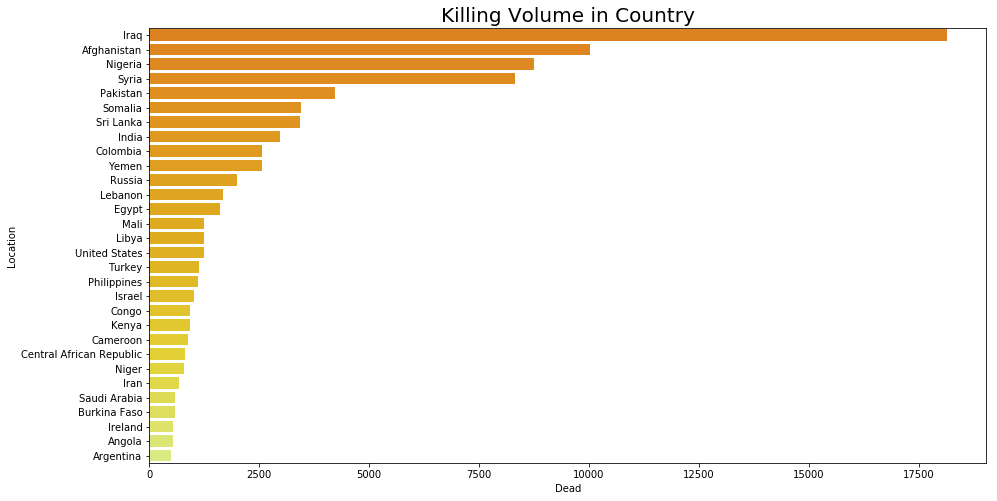

In [734]:
killing_by_Country = TerrorDTframe_notna.groupby('Location').agg({'Dead':np.sum})
killing_by_Country =killing_by_Country.sort_values(by='Dead',ascending=False).reset_index(drop=False) 
killing_by_Country = killing_by_Country.query('Dead != 0')
import squarify
plt.figure(figsize=(15,8))
sns.barplot(x=killing_by_Country['Dead'][0:30], y=killing_by_Country['Location'][0:30],palette='Wistia_r')
#plt.axis('off')
plt.title('Killing Volume in Country',fontsize=20)
#plt.xticks(rotation=90)
plt.show()

# Killings by Perpetrators and years

In [904]:
snsDTFrame = TerrorDTframe_notna.loc[:,['Date','Dead','Perpetrators']]
snsDTFrame = snsDTFrame[snsDTFrame.Perpetrators.isin(['Boko Haram','Islamic State',\
                                                              'Taliban','Jaish-e-Mohammed','Al-Shabaab'])]
yearDTFrame=pd.Series()
Dead_Count_DTFrame = pd.Series()
Perpetrators_DTFrame= pd.Series()
snsDTFrame.drop(index=[2474],axis=0,inplace=True)
for key,value in snsDTFrame.groupby(['Perpetrators','Date']):
    yearDTFrame = yearDTFrame.append(pd.Series(value.Date.unique()[0]))
    Dead_Count_DTFrame = Dead_Count_DTFrame.append(pd.Series(value.Dead.sum()))
    Perpetrators_DTFrame = Perpetrators_DTFrame.append(pd.Series(value.Perpetrators.unique()[0]))
OverallDTFrame = pd.concat([yearDTFrame,Dead_Count_DTFrame,Perpetrators_DTFrame],axis=1)
OverallDTFrame = OverallDTFrame.reset_index(drop=True)
OverallDTFrame.columns=['Date','Dead_Count','Perpetrators']

In [905]:
snsDTFrame_Pivot_table = pd.pivot_table(data = OverallDTFrame,columns='Perpetrators',values='Dead_Count',index='Date')

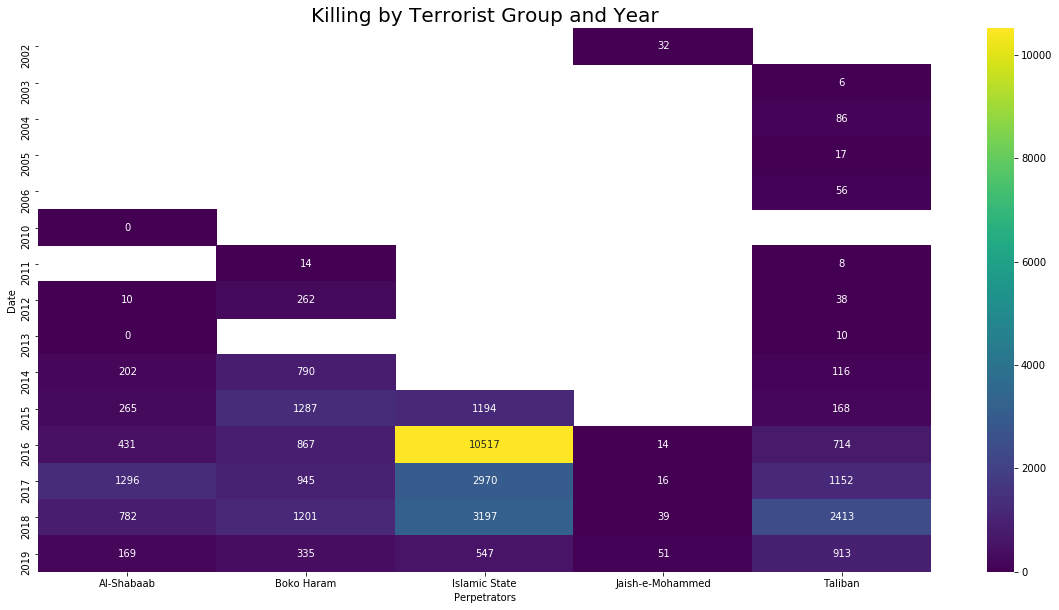

In [910]:
plt.figure(figsize=(20,10))
sns.heatmap(snsDTFrame_Pivot_table,annot=True,cmap='viridis',fmt='g')
plt.title('Killing by Terrorist Group and Year',fontsize=20)
plt.show()

# American Citizens Killed and Injured
## Let’s look now to the numbers of american citizens killed as well as injured worldwide.The leading country for US citizens killed in United States

In [943]:
TerrorDT_In_USA_Dead = TerrorDTframe_notna.loc[TerrorDTframe_notna.Location.str.contains('United States',case=False),\
                                          ['Date','Dead','Perpetrators']]
TerrorDT_In_USA_Dead = TerrorDT_In_USA_Dead.groupby('Date').agg({'Dead':np.sum}).reset_index(drop=False)
TerrorDT_In_USA_Injured = TerrorDTframe_notna.loc[TerrorDTframe_notna.Location.str.contains('United States',case=False),\
                                          ['Date','Injured','Perpetrators']]
TerrorDT_In_USA_Injured = TerrorDT_In_USA_Injured.groupby('Date').agg({'Injured':np.sum}).reset_index(drop=False)

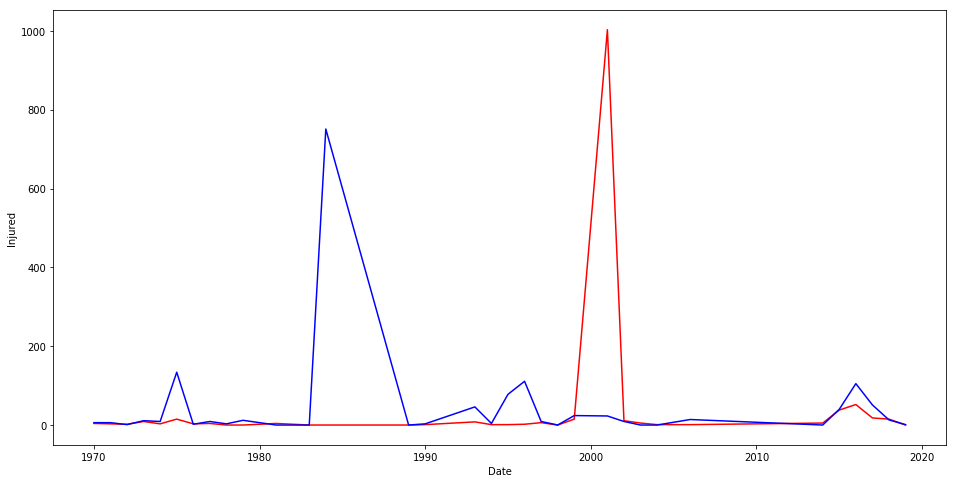

In [945]:
plt.figure(figsize=(16,8))
sns.lineplot(x=TerrorDT_In_USA_Dead.Date,y=TerrorDT_In_USA_Dead.Dead,color='Red')
sns.lineplot(x=TerrorDT_In_USA_Injured.Date,y=TerrorDT_In_USA_Injured.Injured,color='Blue')
plt.show()

# Motive Analysis

## Motive wordcloud

#### Let’s analyze the motive of the attacks. We will treat two alike words the same irrespective of their case

In [960]:
motive_Of_Attacks=''
for each in TerrorDTframe_notna.Type:
    eachsplitted = each.split(',')
    if len(eachsplitted)> 1:
        for elem in eachsplitted:
            motive_Of_Attacks = motive_Of_Attacks + ' ' + elem
    else:
        motive_Of_Attacks = motive_Of_Attacks + ' ' + elem

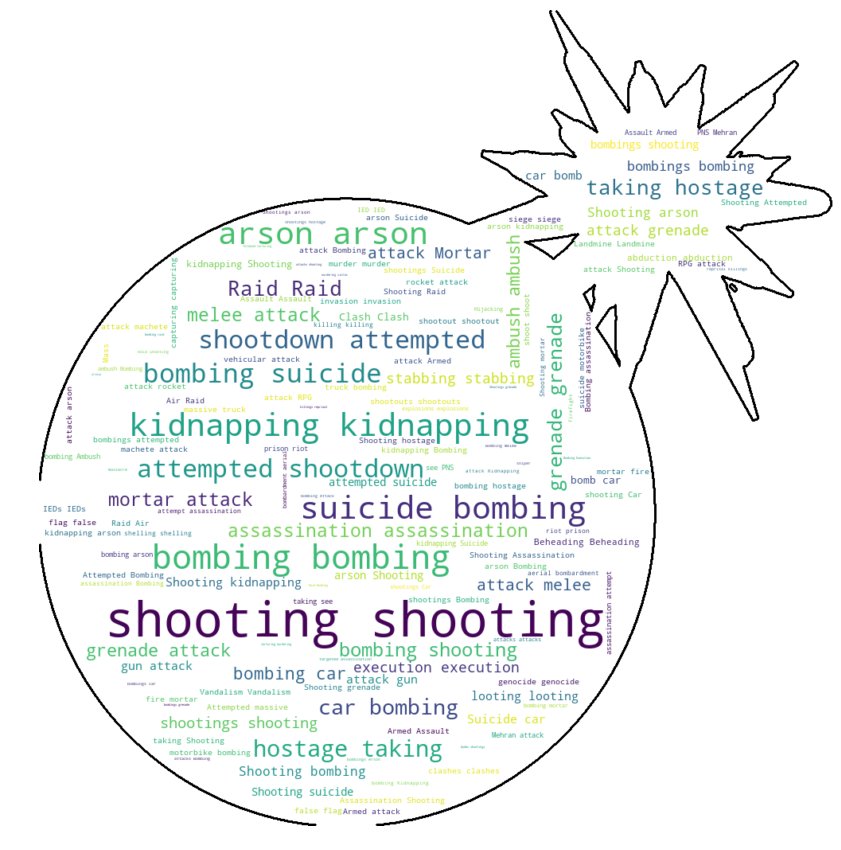

In [973]:
from wordcloud import WordCloud
from PIL import Image
def image_generator(image):
    python_mask = np.array(Image.open(image))
    wcObj = WordCloud(background_color='white',mask=python_mask,contour_color='black',contour_width=3)
    wcObj.generate(motive_Of_Attacks)
    fig=plt.figure(figsize=(30,15))
    plt.imshow(wcObj,interpolation='bilinear')
    plt.axis('off')
    plt.savefig('bomb_wordcloud.png')
    #plt.show()
image_generator('bomb.jpg')

# Perpetrators Group
### Let’s see now the distribution of events and impact grouped on the perpetrators name. 
### First we show the top 10  perpetrators group based on the number of dead victims.

In [974]:
Perpetrators = TerrorDTframe_notna.groupby(['Perpetrators']).agg({'Dead':np.sum})
Perpetrators = Perpetrators.sort_values(by=['Dead'],ascending=False).reset_index(drop=False)
Perpetrators.head()

,Perpetrators,Dead
0,Islamic State,18425
1,Boko Haram,7701
2,Taliban,5697
3,Unknown,3929
4,Al-Shabaab,3155


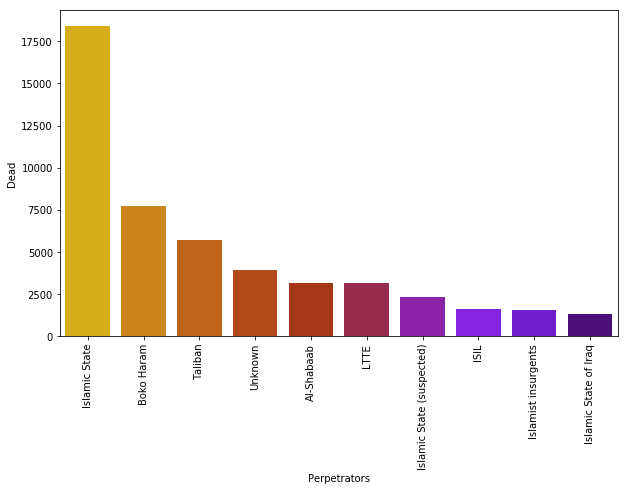

In [975]:
plt.figure(figsize=(10,6))
sns.barplot(x=Perpetrators['Perpetrators'][0:10],y=Perpetrators['Dead'][0:100],palette='gnuplot_r')
plt.xticks(rotation=90)
plt.show()

## Let’s see also the top 10 terror groups based on number of terrorist attacks

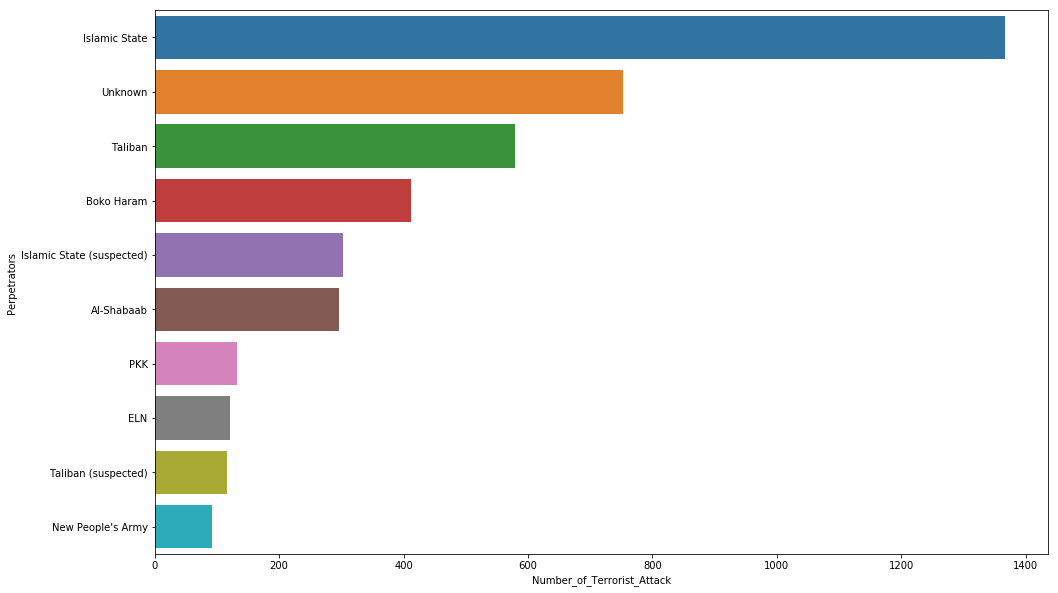

In [983]:
totalTerroristAttack = TerrorDTframe_notna.Perpetrators.value_counts().to_frame().reset_index(drop=False)\
                                                .rename(columns={'index':'Perpetrators','Perpetrators':'Number_of_Terrorist_Attack'})
plt.figure(figsize=(16,10))
sns.barplot(y=totalTerroristAttack.Perpetrators[0:10],x=totalTerroristAttack.Number_of_Terrorist_Attack[0:10])

## Top 10 crimes committed from 1970 to 2019

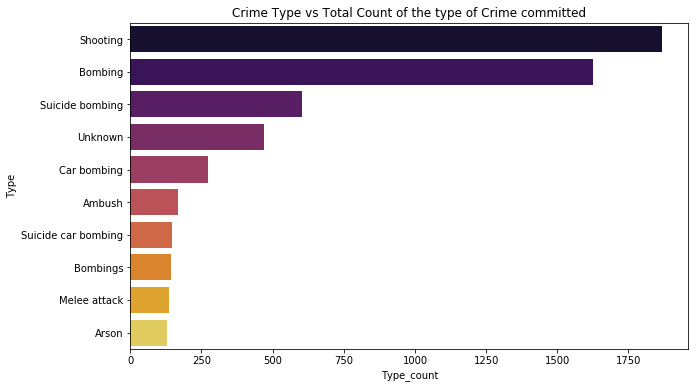

In [984]:
Attack_count = TerrorDTframe_notna.Type.value_counts().to_frame().reset_index(drop=False)\
                                                            .rename(columns={'index':'Type','Type':'Type_count'})
plt.figure(figsize=(10,6))
sns.barplot(y=Attack_count['Type'][0:10],x=Attack_count['Type_count'][0:10],palette='inferno')
plt.title('Crime Type vs Total Count of the type of Crime committed')
plt.show()

In [740]:
# Top 10 Countries where the most terrorist attack happened

In [989]:
Country_with_most_terrorist_attacks = TerrorDTframe_notna.groupby(['Perpetrators']).Type.value_counts()
#Country_with_most_terrorist_attacks = Perpetrators.sort_values(by=['Type'],ascending=False).reset_index(drop=False)
Country_with_most_terrorist_attacks.head()

Perpetrators                       Type        
"Militia"                          Attack          1
15 May Organization                Bombing         1
16-year-old Palestinian lone wolf  Melee attack    1
3 unnamed suspects (lone wolf)     Melee attack    1
3R                                 Shooting        1
Name: Type, dtype: int64

In [741]:
Dead_Loc = TerrorDTframe_notna.groupby(['Location']).agg({'Dead':np.sum})
Dead_Loc = Dead_Loc.sort_values(by=['Dead'],ascending=False).reset_index(drop=False)
Dead_Loc.head()

,Location,Dead
0,Iraq,18134
1,Afghanistan,10024
2,Nigeria,8741
3,Syria,8322
4,Pakistan,4229


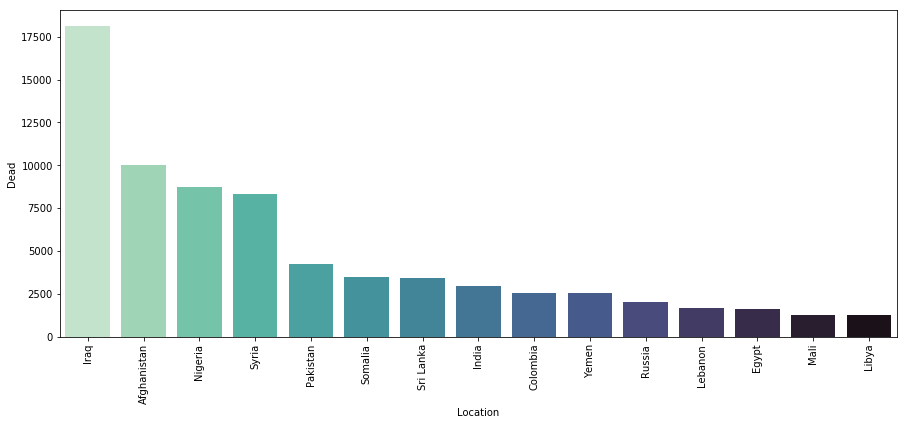

In [742]:
plt.figure(figsize=(15,6))
sns.barplot(x=Dead_Loc['Location'][0:15],y=Dead_Loc['Dead'][0:15],palette='mako_r')
plt.xticks(rotation=90)
plt.show()

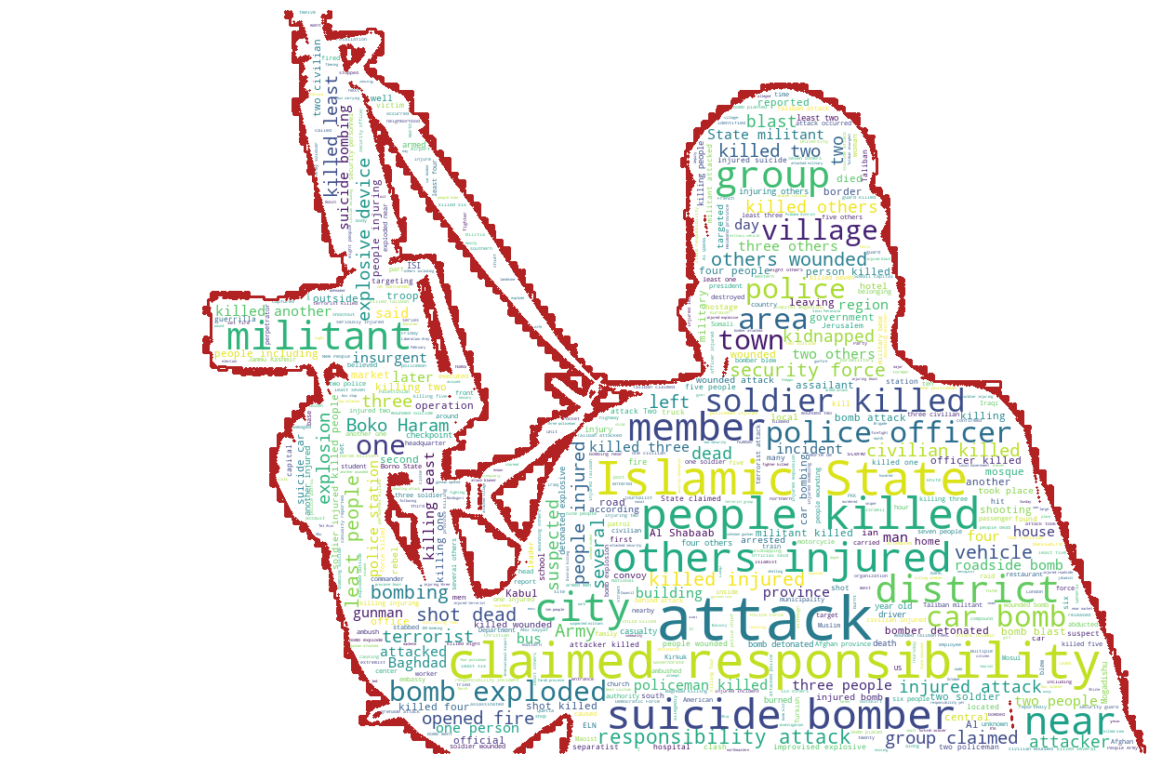

In [743]:
from wordcloud import WordCloud
from PIL import Image
def image_generator(image):
    python_mask = np.array(Image.open(image))
    wcObj = WordCloud(background_color='white',max_words=600,mask=python_mask,contour_color='firebrick',contour_width=3)
    wcObj.generate(strCorpus)
    fig=plt.figure()
    fig.set_figwidth(20)
    fig.set_figheight(20)
    plt.imshow(wcObj,interpolation='bilinear')
    plt.axis('off')
    plt.savefig('wordcloud.png')
    #plt.show()
image_generator('Terrorist.jpg')

In [744]:
Loc_Dead_Count = TerrorDTframe_notna.groupby('Location').agg({'Dead':np.sum})
Loc_Dead_Count = Loc_Dead_Count.sort_values(by='Dead',ascending=False).reset_index(drop=False)

In [745]:
Loc_Dead_Count.head()

,Location,Dead
0,Iraq,18134
1,Afghanistan,10024
2,Nigeria,8741
3,Syria,8322
4,Pakistan,4229


In [746]:
import plotly.plotly as py
import pandas as pd
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df.columns

Index(['COUNTRY', 'GDP (BILLIONS)', 'CODE'], dtype='object')

In [747]:
Loc_Dead_Count.rename(columns={'Location':'COUNTRY'},inplace=True)
Loc_Dead_Count.head()

,COUNTRY,Dead
0,Iraq,18134
1,Afghanistan,10024
2,Nigeria,8741
3,Syria,8322
4,Pakistan,4229


In [748]:
tempDT = pd.merge(Loc_Dead_Count,df,how='inner',on='COUNTRY')

In [749]:
tempDT.head()

,COUNTRY,Dead,GDP (BILLIONS),CODE
0,Iraq,18134,232.20,IRQ
1,Afghanistan,10024,21.71,AFG
2,Nigeria,8741,594.30,NGA
3,Syria,8322,64.70,SYR
4,Pakistan,4229,237.50,PAK


In [750]:
data = [dict(
    type='choropleth',
    locations=tempDT['CODE'],
    z=tempDT['Dead'],
    text=tempDT['COUNTRY'],
    colorscale=[[0, "rgb(5, 10, 172)"], [0.35, "rgb(40, 60, 190)"], [0.5, "rgb(70, 100, 245)"],\
                [0.6, "rgb(90, 120, 245)"], [0.7, "rgb(106, 137, 247)"], [1, "rgb(220, 220, 220)"]],
    autocolorscale=False,
    reversescale=True,
    
    colorbar=dict(
        autotick=True,
        title='Dead_Count'),
)]

layout = dict(
    title='Total_Dead_Person_Count_On_Countries',
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

fig = dict(data=data, layout=layout)
plot(fig,validate=False, filename='d3-world-map.html')

'file://C:\\Users\\supratik chanda\\Desktop\\Python Tutorial1\\Data Science Final Project\\d3-world-map.html'

## Question 1: What type of terrorist attacks(e.g. shooting,bomb etc.) is the most in which country 

In [751]:
groupByCountry = TerrorDTframe_notna.groupby(['Location','Type']).agg({'Dead':np.sum})
groupByCountry = groupByCountry.reset_index(drop=False)

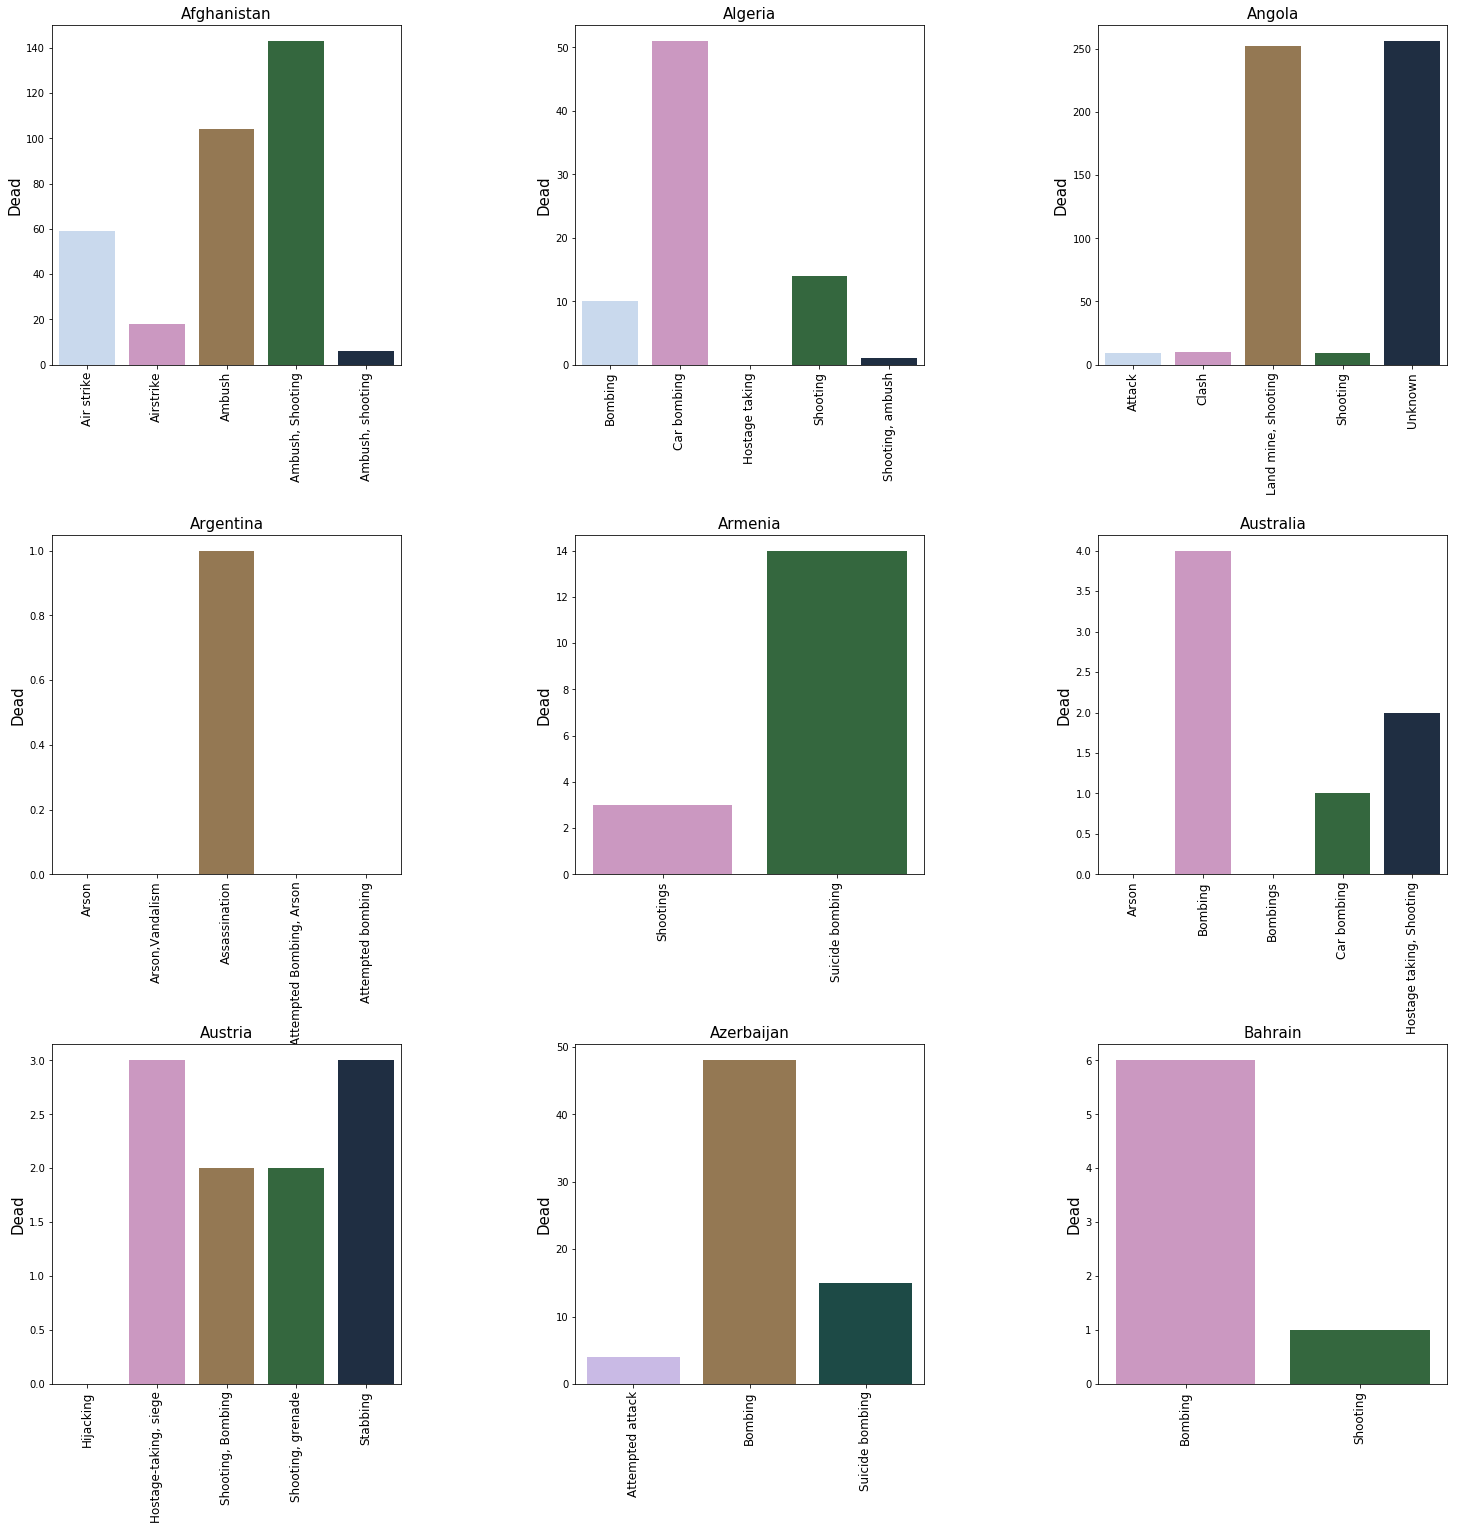

In [752]:
i=1
fig=plt.figure(figsize=(25,25))
fig.subplots_adjust(wspace=0.5,hspace=0.5)
for key,value in groupByCountry.groupby('Location'):
    if value.Dead.sum() > 0:
        ax= fig.add_subplot(3,3,i)
        ax = sns.barplot(x=value['Type'][0:5],y=value['Dead'][0:5],palette='cubehelix_r')
        i+=1
        plt.title(key,fontsize=15)
        plt.xticks(rotation=90,fontsize=12)
        plt.ylabel('Dead',fontsize=15)
        plt.xlabel('')
        if i ==10:
            break
    

In [753]:
TerrorDTframe_Filtered['Perpetrators'] = TerrorDTframe_Filtered['Perpetrators'].apply(lambda x : (x.lower())\
                                                                                      .title().strip())

### Most notorious 10 groups with highest terror attacks(dead)


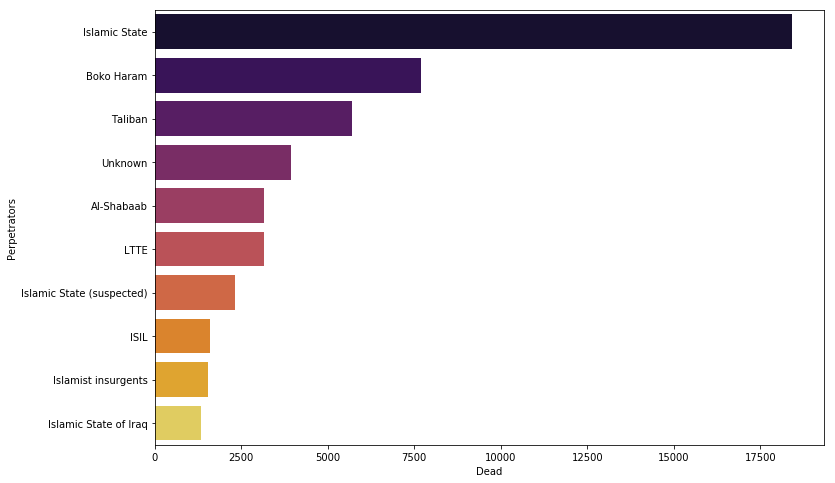

In [754]:
grp_with_highest_attacks = TerrorDTframe_notna.groupby('Perpetrators').agg({'Dead':np.sum})
grp_with_highest_attacks = grp_with_highest_attacks.sort_values(by='Dead',ascending=False).reset_index(drop=False)
plt.figure(figsize=(12,8))
sns.barplot(x=grp_with_highest_attacks['Dead'][0:10],y = grp_with_highest_attacks['Perpetrators'][0:10],palette='inferno')

## Which terrorist group has caused highest death count in countries.

In [755]:
TerrorDTframe_notna.head(1)

,Date,Type,Dead,Injured,Location,Description,Perpetrators
0,1970-01-13,Shotdown,7,0,Colombia,UH-1 Iroquois helicopter Colombian Air Force disappears amidst strange circumstance Urabá Antioquia PLA awarded shotdown seven crew member died,EPL


In [756]:
k =TerrorDTframe_notna.groupby(['Location','Perpetrators']).agg({'Dead':np.sum})
k.reset_index(drop=False,inplace=True)

In [757]:
most_terror_in_country = pd.DataFrame()
for each in TerrorDTframe_notna.Location.unique():
    country_terror = k.groupby('Location').get_group(each).sort_values(by='Dead',ascending=False).reset_index(drop=True)[0:1]
    most_terror_in_country = pd.concat([most_terror_in_country,country_terror],axis=0)
most_terror_in_country.reset_index(drop=True,inplace=True)
most_terror_in_country.rename(columns={'Location':'COUNTRY'},inplace=True)
most_terror_in_country.head()

,COUNTRY,Perpetrators,Dead
0,Colombia,FARC,657
1,Ireland,Babbar Khalsa,329
2,Germany,Black September,17
3,Switzerland,PFLP-GC,47
4,United States,Al-Qaeda (disputed),998


In [762]:
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [763]:
most_terror_in_country_DTFrame = pd.merge(most_terror_in_country,df,how='inner',on='COUNTRY')
most_terror_in_country_DTFrame.head()

,COUNTRY,Perpetrators,Dead,GDP (BILLIONS),CODE
0,Colombia,FARC,657,400.1,COL
1,Ireland,Babbar Khalsa,329,245.8,IRL
2,Germany,Black September,17,3820.0,DEU
3,Switzerland,PFLP-GC,47,679.0,CHE
4,United States,Al-Qaeda (disputed),998,17420.0,USA


In [764]:
most_terror_in_country_DTFrame['Perpetrators_Name_with_COUNTRY_Name'] = pd.DataFrame(most_terror_in_country_DTFrame['Perpetrators']+ '::' + most_terror_in_country_DTFrame['COUNTRY'])
most_terror_in_country_DTFrame.head()

,COUNTRY,Perpetrators,Dead,GDP (BILLIONS),CODE,Perpetrators_Name_with_COUNTRY_Name
0,Colombia,FARC,657,400.1,COL,FARC::Colombia
1,Ireland,Babbar Khalsa,329,245.8,IRL,Babbar Khalsa::Ireland
2,Germany,Black September,17,3820.0,DEU,Black September::Germany
3,Switzerland,PFLP-GC,47,679.0,CHE,PFLP-GC::Switzerland
4,United States,Al-Qaeda (disputed),998,17420.0,USA,Al-Qaeda (disputed)::United States


### Map showing terrorists responsible for the maximum deaths in the country: Start

In [765]:
data = [dict(
    type='choropleth',
    locations=most_terror_in_country_DTFrame['CODE'],
    z=most_terror_in_country_DTFrame['Dead'],
    text=most_terror_in_country_DTFrame['Perpetrators_Name_with_COUNTRY_Name'],
    colorscale=[[0, "rgb(5, 10, 172)"], [0.4, "rgb(40, 60, 190)"], [0.5, "rgb(70, 100, 245)"],\
                [0.3, "rgb(90, 120, 245)"], [0.5, "rgb(106, 137, 247)"], [1, "rgb(220, 220, 220)"]],
    autocolorscale=False,
    reversescale=True,
    
    colorbar=dict(
        autotick=True,
        title='Dead_Count'),
)]

layout = dict(
    title='Terrorist who are responsible for the maximum deaths',
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

fig = dict(data=data, layout=layout)
plot(fig,validate=False, filename='d3-world-map-od-max-deaths-by-a-terrorist-group.html')


'file://C:\\Users\\supratik chanda\\Desktop\\Python Tutorial1\\Data Science Final Project\\d3-world-map-od-max-deaths-by-a-terrorist-group.html'

## Which terrorist forces are increasing each year 

In [766]:
TerrorDTframe_notna.dtypes

Date            object
Type            object
Dead             int64
Injured          int64
Location        object
Description     object
Perpetrators    object
dtype: object

In [767]:
TerrorDTframe_notna['Date'] = pd.to_datetime(TerrorDTframe_notna['Date'])

In [768]:
TerrorDTframe_notna.dtypes

Date            datetime64[ns]
Type                    object
Dead                     int64
Injured                  int64
Location                object
Description             object
Perpetrators            object
dtype: object

In [769]:
TerrorDTframe_notna['Date'] = TerrorDTframe_notna['Date'].dt.year

In [770]:
TerrorDTframe_notna.head()

,Date,Type,Dead,Injured,Location,Description,Perpetrators
0,1970,Shotdown,7,0,Colombia,UH-1 Iroquois helicopter Colombian Air Force disappears amidst strange circumstance Urabá Antioquia PLA awarded shotdown seven crew member died,EPL
1,1970,Bombing,0,0,Ireland,bomb explodes home Ulster Liberal Party MP Sheelagh Murnaghan,Ulster Volunteer Force
2,1970,"Shooting, grenade attacks",1,23,Germany,bus carrying passenger El Al airplane Munich-Riem Airport West Germany attacked Palestinian terrorist One person killed 23 wounded attack,PDFLP
3,1970,Bombing,0,0,Ireland,bomb detonated TV station transmitted RTÉ ( Mainly Irish broadcaster ),Ulster Volunteer Force
4,1970,Bombing,47,0,Switzerland,bomb explodes rear Swissair Flight 330 causing crash near Zürich killing 38 passenger 9 crew member attack carried Palestinian group PFLP-GC,PFLP-GC


In [771]:
grp_with_highest_attacks[0:6]

,Perpetrators,Dead
0,Islamic State,18425
1,Boko Haram,7701
2,Taliban,5697
3,Unknown,3929
4,Al-Shabaab,3155
5,LTTE,3145


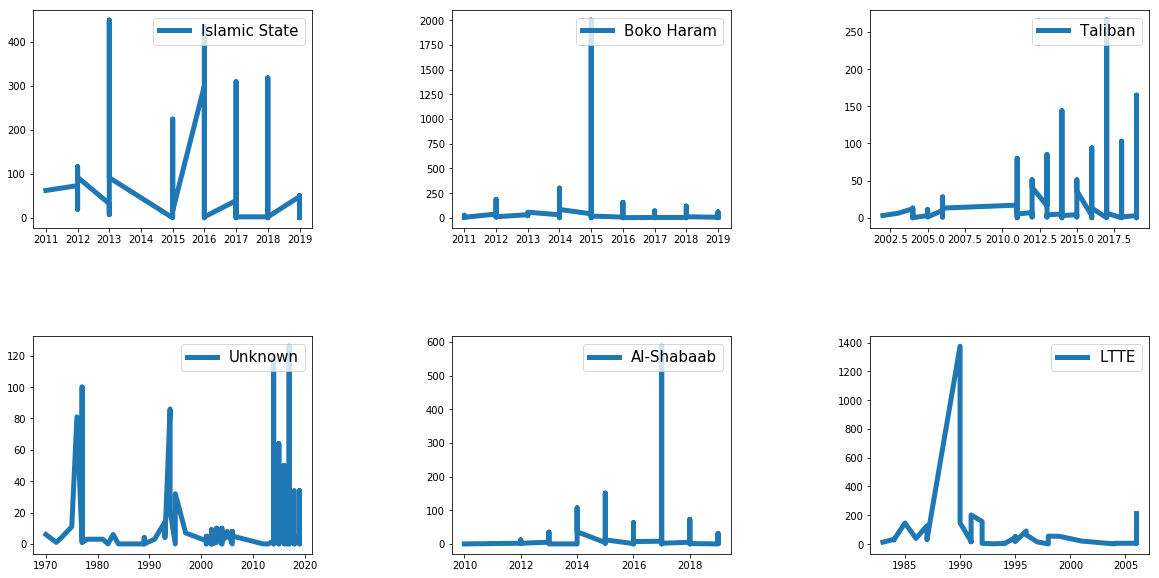

In [772]:
fig=plt.figure(figsize=(20,10)) 
fig.subplots_adjust(wspace=0.5,hspace=0.5)
i=1
for each in grp_with_highest_attacks.Perpetrators[0:6]:
        dt = TerrorDTframe_notna[TerrorDTframe_notna.Perpetrators.str.contains(each,case=False)]
        ax=fig.add_subplot(2,3,i)
        ax=plt.plot(dt['Date'],dt['Dead'],label=each,lw=5)
        i+=1
        plt.legend(loc='upper right',fontsize=15)
#plt.show()

## Correlation between values: Start

In [773]:
TerrorDTframe_notna.columns

Index(['Date', 'Type', 'Dead', 'Injured', 'Location', 'Description',
       'Perpetrators'],
      dtype='object')

In [774]:
for each in ['Type','Location','Description']

,Date,Dead,Injured
Date,1.000000,-0.075633,-0.090135
Dead,-0.075633,1.000000,0.169588
Injured,-0.090135,0.169588,1.000000


In [ ]:
# End

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
vectorizer = tfidf(max_features=2000)
X_description = vectorizer.fit_transform(TerrorDTframe_notna.Description)
print(vectorizer.get_feature_names()[0:10])
X_description = X_description.toarray()

In [700]:
dtFrame= pd.DataFrame(X_description)

In [701]:
dtFrame = pd.concat([dtFrame,TerrorDTframe_notna.Type,TerrorDTframe_notna.Location],axis=1)

In [702]:
print(dtFrame.shape)
dtFrame.head()

(9319, 2002)


,0,1,2,3,4,5,6,7,8,9,...,1992,1993,1994,1995,1996,1997,1998,1999,Type,Location
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shotdown,Colombia
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bombing,Ireland
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Shooting, grenade attacks",Germany
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bombing,Ireland
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bombing,Switzerland


In [703]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lm = LogisticRegression()
X = pd.get_dummies(data = dtFrame,columns=['Type','Location'])


In [704]:
X= pd.concat([X,TerrorDTframe_Filtered.Perpetrators],axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,Location_Ukraine,Location_United Arab Emirates,Location_United Kingdom,Location_United States,Location_Uruguay,Location_Uzbekistan,Location_West Bank,Location_Yemen,Location_Zimbabwe,Perpetrators
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Islamic State
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Boko Haram
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Boko Haram
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Taliban
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Militants


In [705]:
X = X[X.Perpetrators.notna()]
X.shape

(8514, 2925)

In [661]:
X.to_csv('RefinedTerrorData.csv',index=False)

In [706]:
import warnings
warnings.simplefilter('ignore')
train_set,test_set = train_test_split(X,test_size=0.2,random_state=0)
param_grid = dict(C=[0.1,0.5,0.8,1],penalty=['l1','l2'],random_state=[0,5,16,27])
rdSearchCV = RandomizedSearchCV(lm,param_grid,cv=5).fit(train_set.iloc[:,:-1],train_set.iloc[:,-1])
print('For RandomizedSearchCV:')
print('grid best score for train_set: for random_state: ',rdSearchCV.best_score_)
print('grid best parameters for train_set: ',rdSearchCV.best_params_)

For RandomizedSearchCV:
grid best score for train_set: for random_state:  0.1892526794890618
grid best parameters for train_set:  {'random_state': 16, 'penalty': 'l2', 'C': 0.1}


In [ ]:
Accent, Accent_r,
Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2,
Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, 
Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, 
PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, 
Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr,
YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r,
cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, 
gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow,
gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray,
gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, 
nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r,
rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, 
tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, 
twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r